In [2]:
import yaml
import numpy as np
import zstandard as zstd
import os
from TraceSimulator import TraceSimulator
def read_yaml_to_dict(file_path):
    with open(file_path, 'r') as file:
        config_dict = yaml.safe_load(file)
    return config_dict

config = read_yaml_to_dict('../archive/config.yaml')

ts = TraceSimulator(config)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

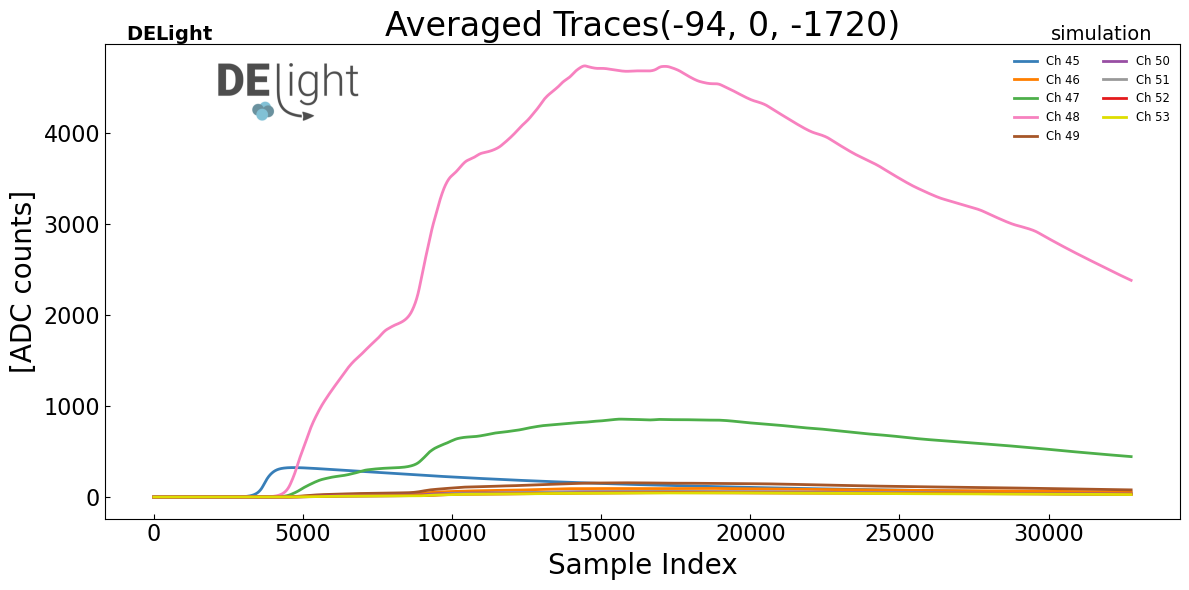

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import DELightStyle

num_sets = 100
start_channel = 45

# Generate the first trace to determine shapes
trace, (x, y, z) = ts.generate(E=30000, no_noise=True, type_recoil='NR', quantize=False, phonon_only=True)
num_channels, num_samples = trace[0].shape

# Preallocate array to hold traces for selected channels
trace_accumulator = np.zeros((num_channels - start_channel, num_samples))

# Accumulate traces
for _ in range(num_sets):
    trace = ts.generate(E=30000, x = -94, y = 0, z=-1720, no_noise=True, type_recoil='NR', quantize=False, phonon_only=True)
    trace_accumulator += trace[0][start_channel:]

# Average over all sets
avg_traces = trace_accumulator / num_sets

# Normalize each channel to its maximum
normalized_traces = avg_traces / np.max(np.abs(avg_traces), axis=1, keepdims=True)

# Plot the normalized average traces
fig, ax = plt.subplots(figsize=(12, 6))  # Get both fig and ax objects
for i, ch in enumerate(avg_traces):
    ax.plot(ch, label=f'Ch {start_channel + i}')

ax.set_title("Averaged Traces(-94, 0, -1720)")
ax.set_xlabel("Sample Index")
ax.set_ylabel("[ADC counts]")
ax.legend(loc='upper right', fontsize='small', ncol=2)

# Apply DELightStyle elements with correct ax reference
DELightStyle.display_text(ax, r'$\mathbf{DELight}$', x0=0.02, y0=1.045)
DELightStyle.display_delight_logo(ax, x0=0.02, y0=0.98)
DELightStyle.display_text(ax, "simulation", x0=0.88, y0=1.04)

plt.tight_layout()
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

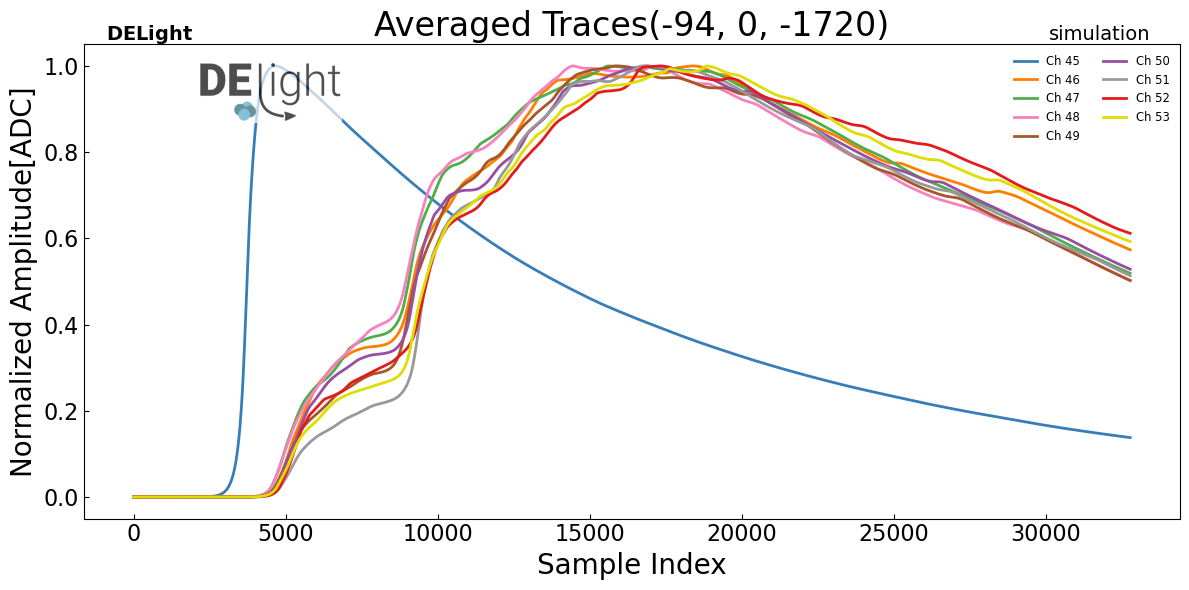

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))  # Get both fig and ax objects
for i, ch in enumerate(normalized_traces):
    ax.plot(ch, label=f'Ch {start_channel + i}')

ax.set_title("Averaged Traces(-94, 0, -1720)")
ax.set_xlabel("Sample Index")
ax.set_ylabel("Normalized Amplitude[ADC]")
ax.legend(loc='upper right', fontsize='small', ncol=2)

# Apply DELightStyle elements with correct ax reference
DELightStyle.display_text(ax, r'$\mathbf{DELight}$', x0=0.02, y0=1.045)
DELightStyle.display_delight_logo(ax, x0=0.02, y0=0.98)
DELightStyle.display_text(ax, "simulation", x0=0.88, y0=1.04)

plt.tight_layout()
plt.show()

In [ ]:
xy_coordinates = [
    (0, 0),
    (94, 0),
    (-66.46904, 66.46804),
    (-66.46804, -66.46804)
]
fixed_z = -1800
Energy = 150

# Dictionary to store the normalized total average traces for each (x, y) set
normalized_traces_by_xy = {}

# Determine shapes once (assuming they are consistent regardless of x, y, or phonon_only=True/False)
# Using one of the (x,y) sets and phonon_only=True as per original logic for shape determination.
initial_trace_for_shape = ts.generate(E=Energy, x=0, y=0, z=fixed_z, no_noise=True, type_recoil='NR', quantize=False, phonon_only=True)
num_channels, num_samples = initial_trace_for_shape[0].shape

# Loop through each (x, y) coordinate set to generate and process traces
for x_val, y_val in xy_coordinates:
    print(f"Processing traces for (x, y) = ({x_val}, {y_val})")

    # Preallocate array for the current (x, y) set
    # Still accumulating from start_channel as per original code
    trace_accumulator = np.zeros((num_channels - start_channel, num_samples))

    for _ in range(num_sets):
        # Generate trace for the current (x, y), fixed z, no_noise=True, phonon_only=False
        trace = ts.generate(E=Energy, x=x_val, y=y_val, z=fixed_z, no_noise=True, type_recoil='NR', quantize=False, phonon_only=True)
        trace_accumulator += trace[0][start_channel:]

    # Average over all sets for the current (x, y)
    avg_traces = trace_accumulator / num_sets

    # Sum all channels in the averaged trace to get a single combined trace
    total_avg_trace = np.sum(avg_traces, axis=0)

    # Normalize the single summed trace to its maximum
    # Ensure to handle division by zero if total_avg_trace is all zeros (unlikely for real data)
    max_amp = np.max(np.abs(total_avg_trace))
    if max_amp > 1e-9: # A small threshold to prevent division by near-zero
        normalized_total_avg_trace = total_avg_trace / max_amp
    else:
        normalized_total_avg_trace = total_avg_trace # If flat zero, keep it zero

    # Store the result, using a formatted string as the key for clarity in printing
    normalized_traces_by_xy[f"({x_val}, {y_val})"] = normalized_total_avg_trace

# Plot all normalized average traces together
plt.figure(figsize=(14, 7))
for xy_label, data in normalized_traces_by_xy.items():
    plt.plot(data, label=f'x,y = {xy_label}')

plt.title(f"Normalized Averaged Sum of Traces (Channels {start_channel} onwards) for Z = {fixed_z}")
plt.xlabel("Sample Index")
plt.ylabel("Normalized Amplitude")
plt.legend(title="X,Y-Position")
plt.grid(True)
plt.tight_layout()
plt.show()